# GIK2FB Artificial Intelligence

Dalarna University, Joonas Pääkkönen, fall 2021

## Lab 3: Linear regression

### Deadline: Thursday Dec. 9th, 2021, 23:59 CET time

It is okay to work in pairs. However, if you work with another student, add his or her name below, too.

Upload your .ipynb file to Learn. Use file name format “lab3 firstname lastname studentid.ipynb", e.g., “lab3 jim jonsson v21abcde hanna jansson v21abcda.ipynb”.

For grade G: execute all the given tasks.

Use Scikit-learn first and foremost, with the help of Pandas, NumPy, SciPy, Matplotlib and Seaborn, if needed. Remember that Pandas dataframes come in very handy in data science. There are explanations on the Sklearn website about linear regression, R^2 values, etc.

Explain your code with comments. You may write in English or Swedish.

Note: pairplots may take several seconds or even minutes to plot depending on how fast your system is.

Plagiarism: Do not blindly copy-paste anything. You need to be able to explain your solution and analyse the results. The plagiarism rules of the university apply. As explained above, you may work in pairs but in that case, add both names and email addresses below.

### Remember to fill in the information below, student name(s) and email address(es).

### Student name(s): 
xd

### DU email address(es): 
xd

## Lab 3: Linear regression

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Task 3.1: Download the hungary_chickenpox.csv dataset from
https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases and save the data into a variable called "chickendata" with the read.csv() method of the Pandas module.

In [2]:
# Read data from csv file
chickendata = pd.read_csv('hungary_chickenpox.csv')

Task 3.2: Print the chickendata dataset by simply writing the variable name. Shortly explain what you see.

In [3]:
# Printing chicken data
chickendata

Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  \
0      3/1/2005       168       79    30    173     169        42    136   
1     10/1/2005       157       60    30     92     200        53     51   
2    17/01/2005        96       44    31     86      93        30     93   
3    24/01/2005       163       49    43    126      46        39     52   
4    31/01/2005       122       78    53     87     103        34     95   
..          ...       ...      ...   ...    ...     ...       ...    ...   
517   1/12/2014        95       12    41      6      39         0     16   
518   8/12/2014        43       39    31     10      34         3      2   
519  15/12/2014        35        7    15      0       0         0      7   
520  22/12/2014        30       23     8      0      11         4      1   
521  29/12/2014       259       42    49     32      38        15     11   

     GYOR  HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  \
0     120    162  ...   130       57       2   178      66        64     11   
1      70     84  ...    80       50      29   141      48        29     58   
2      84    191  ...    64       46       4   157      33        33     24   
3     114    107  ...    63       54      14   107      66        50     25   
4     131    172  ...    61       49      11   124      63        56      7   
..    ...    ...  ...   ...      ...     ...   ...     ...       ...    ...   
517    15     14  ...    56        7      13   122       4        23      4   
518    30     25  ...    34       20      18    70      36         5     23   
519     7      4  ...    30       36       4    72       5        21     14   
520     9     10  ...    27       17      21    12       5        17      1   
521    98     61  ...   112       61      53   256      45        39     27   

     VAS  VESZPREM  ZALA  
0     29        87    68  
1     53        68    26  
2     18        62    44  
3     21        43    31  
4     47        85    60  
..   ...       ...   ...  
517   11       110    10  
518   22        63     9  
519    0        17    10  
520    1        83     2  
521   11       103    25  

[522 rows x 21 columns]

Task 3.3: Use the Pandas describe() method to describe chickendata. Shortly explain what you see.

Data from the time series show a reading level where it describes the weekly number of infected cases of Hungarian chickenpox reported by general practitioners.

The data set is a coverage between from January 2005 and January 2015 where it results in a time series of more than 500 registered cases for all counties.

In [4]:
# Displaying data using describe.
round(chickendata.describe())

BUDAPEST  BARANYA   BACS  BEKES  BORSOD  CSONGRAD  FEJER   GYOR  HAJDU  \
count     522.0    522.0  522.0  522.0   522.0     522.0  522.0  522.0  522.0   
mean      101.0     34.0   37.0   29.0    57.0      31.0   33.0   41.0   47.0   
std        76.0     33.0   37.0   38.0    51.0      34.0   31.0   36.0   45.0   
min         0.0      0.0    0.0    0.0     0.0       0.0    0.0    0.0    0.0   
25%        34.0      8.0    8.0    4.0    14.0       6.0    7.0    9.0   11.0   
50%        93.0     25.0   30.0   14.0    46.0      20.0   24.0   35.0   37.0   
75%       149.0     51.0   53.0   39.0    84.0      47.0   52.0   63.0   68.0   
max       479.0    194.0  274.0  271.0   355.0     199.0  164.0  181.0  262.0   

       HEVES   JASZ  KOMAROM  NOGRAD   PEST  SOMOGY  SZABOLCS  TOLNA    VAS  \
count  522.0  522.0    522.0   522.0  522.0   522.0     522.0  522.0  522.0   
mean    30.0   41.0     26.0    22.0   86.0    28.0      30.0   20.0   22.0   
std     32.0   37.0     24.0    22.0   67.0    27.0      32.0   23.0   25.0   
min      0.0    0.0      0.0     0.0    0.0     0.0       0.0    0.0    0.0   
25%      6.0   10.0      6.0     4.0   28.0     6.0       6.0    4.0    3.0   
50%     21.0   31.0     19.0    15.0   81.0    20.0      18.0   12.0   13.0   
75%     41.0   62.0     39.0    33.0  130.0    41.0      45.0   29.0   34.0   
max    210.0  224.0    160.0   112.0  431.0   155.0     203.0  131.0  141.0   

       VESZPREM   ZALA  
count     522.0  522.0  
mean       41.0   20.0  
std        41.0   22.0  
min         0.0    0.0  
25%         7.0    4.0  
50%        32.0   13.0  
75%        59.0   31.0  
max       230.0  216.0

Task 3.4: Use Seaborn to plot the pairplot of the dataset. Shortly explain what you see.

The plot shows us an overview of the infected cases of chickenpox. We can see that most victimes that gets infected is at the beginning of the year.

( old )We can see that at the beginning of the year are most infected and then even out the infection

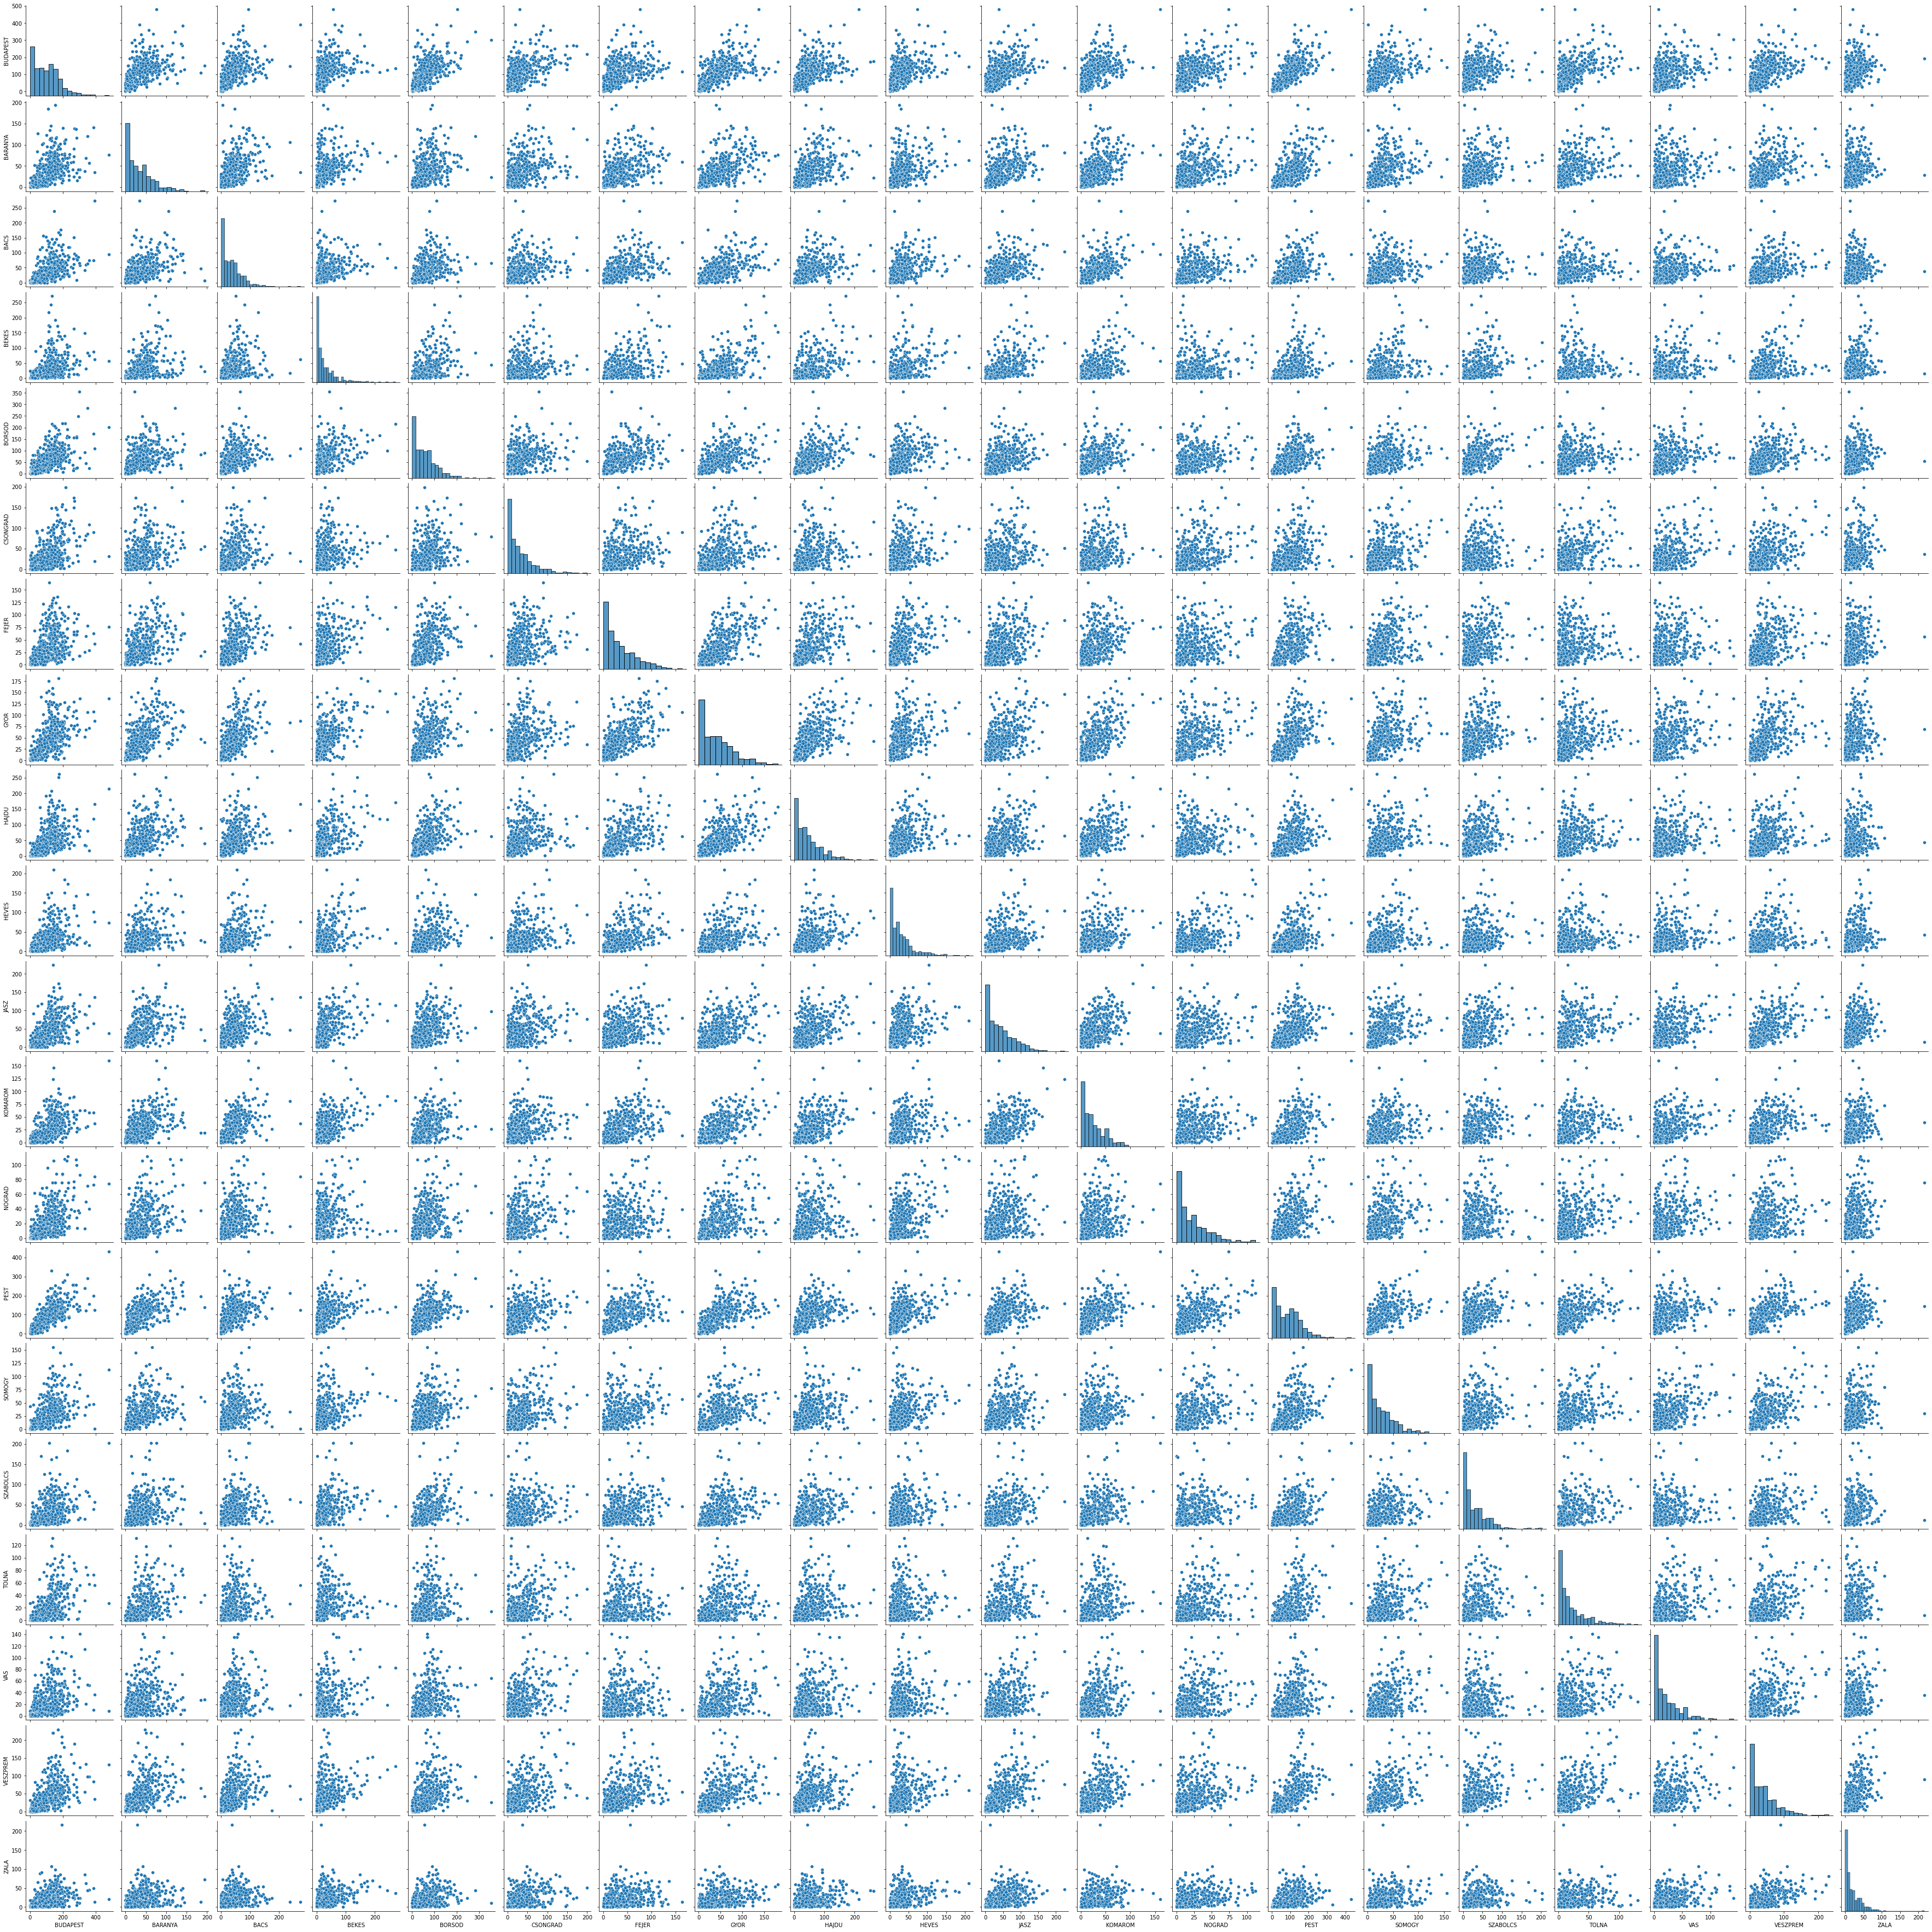

In [5]:
# Displaying the pairplot.
sns.pairplot(data=chickendata)

Task 3.5: Plot a scatterplot where the x-coordinates are from the BUDAPEST column and the y-coordinates are from the VAS column.

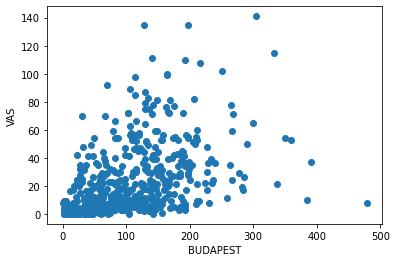

In [6]:
#Plotting scatterplot over BUDAPEST and VAS.
plt.xlabel('BUDAPEST')
plt.ylabel('VAS')
plt.scatter(chickendata[['BUDAPEST']], chickendata[['VAS']])

Task 3.6: Use Scikit-learn to fit a simple linear OLS regression line to the data visualized in Task 3.5. Plot the linear regression line alongside the scatterplot of Task 3.5. Make sure the line and the scatterplot points are in different colors. Note: you may need to reshape the data first in your Python code.

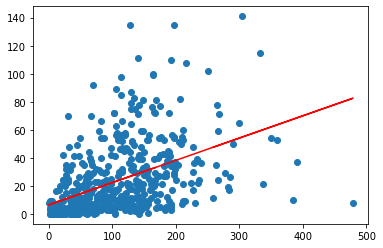

In [7]:
#Here we use OLS regression.
#Reshapping the data for BUDAPEST and VAS
x = chickendata.iloc[:,1].values.reshape(-1, 1) # -1 meant that it will automatically calculate the dimensions
y = chickendata.iloc[:,18].values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

r_sq = lr.score(x,y)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

Task 3.7: What is the value of the coefficient $w_1$ of the linear model? What is the value of the intercept $w_0$? What is the value of the coefficient of determination for the linear regression model of Task 3.6?

In [8]:
#Printing the results from 3.6
print("Coefficients: ", lr.coef_)
print('Value of intercept:', lr.intercept_)
print('Coefficient of determination:', r_sq)

Coefficients:  [[0.15898364]]
Value of intercept: [6.37110122]
Coefficient of determination: 0.2356501580146917


Task 3.8: Use Scikit-learn to fit an ordinary least squares linear regression model to predict the values of the BUDAPEST column with all the other data columns of the chickendata dataset, not only with the VAS column. Find the $R^2$-value for the prediction. Similarly, fit a Ridge regression model and also a LASSO regression model to the same data. Find the corresponding $R^2$-values for these two models as you did for the simple linear regression model. That is, you need to print all the three coefficients of determination to pass this task.

In [9]:
#Making the chickendata to a dataframe.
chickendata_df = pd.DataFrame(chickendata)

In [10]:
#Dropping DATE & BUDAPEST from the dataset and moving BUDAPEST into its own variable.
x = chickendata_df.drop(['BUDAPEST'], axis=1)
x = x.drop(['Date'], axis=1)
y = chickendata_df['BUDAPEST']

## Using Linear Regression



In [11]:
#Using Linear Regression we fit the data to predict the BUDAPEST column.
#Linear Regression
lr = LinearRegression()
lr.fit(x, y)
#making a prediction from fit with the data.
y_pred = lr.predict(x)
ols_intercept = lr.intercept_
ols_coef = lr.coef_

ols_r_sq = lr.score(x,y)
print(f'OLS coefficients are {ols_coef}')
print(f'OLS value of intercept is {ols_intercept}')
print(f'OLS coefficient of determination is {ols_r_sq}')

OLS coefficients are [-0.15646341  0.22087773 -0.04243481  0.28655075  0.41294833 -0.14402838
  0.12372446  0.07193781 -0.13909798  0.15363807  0.20488909  0.53786186
  0.38143568  0.1710726  -0.03841412  0.34595445 -0.1769806  -0.15348159
  0.21290604]
OLS value of intercept is 9.898356218120938
OLS coefficient of determination is 0.7203360896133674


## Using RIDGE Regression


In [12]:
#Using RIDGE Regression we fit the data to predict the BUDAPEST column.
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x,y)
#making a prediction from the fit with the data.
y_pred = ridge.predict(x)
ridge_intercept = ridge.intercept_
ridge_coef = ridge.coef_
ridge_r_sq = ridge.score(x,y)

print(f'Ridge coefficients are {ridge_coef}')
print(f'Ridge value of intercept is {ridge_intercept}')
print(f'Ridge coefficient of determination is {ridge_r_sq}')

Ridge coefficients are [-0.15646122  0.22087742 -0.04243463  0.28655028  0.41294703 -0.14402775
  0.12372431  0.07193775 -0.13909604  0.15363693  0.20488705  0.53785782
  0.38143561  0.17107093 -0.03841287  0.34595313 -0.17697716 -0.15347979
  0.21290483]
Ridge value of intercept is 9.898387003323393
Ridge coefficient of determination is 0.7203360896113249


## Using LASSO Regression

In [13]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x,y)
#making a prediction from the fit with the data.
y_pred = lasso.predict(x)
lasso_r_sq = lasso.score(x,y)
lasso_intercept = lasso.intercept_
lasso_coef = lasso.coef_

print(f'Lasso coefficients are {lasso_coef}')
print(f'Lasso value of intercept is {lasso_intercept}')
print(f'Lasso coefficient of determination is {lasso_r_sq}')

Lasso coefficients are [-0.15143787  0.21991387 -0.04001587  0.28523     0.41030876 -0.14026753
  0.12023945  0.07103972 -0.13533064  0.15006046  0.2006152   0.53419334
  0.38089183  0.16517468 -0.03416359  0.34376019 -0.16793044 -0.14853858
  0.20779441]
Lasso value of intercept is 9.961354076047314
Lasso coefficient of determination is 0.7203244935638704


## Printing out all the coefficient of determinations.

In [14]:
#Printing out the coefficient for OLS, RIDGE & LASSO.
print(f'OLS coefficient of determination is {ols_r_sq}')
print(f'Ridge coefficient of determination is {ridge_r_sq}')
print(f'Lasso coefficient of determination is {lasso_r_sq}')

OLS coefficient of determination is 0.7203360896133674
Ridge coefficient of determination is 0.7203360896113249
Lasso coefficient of determination is 0.7203244935638704


Task 3.9: What are the values of the coefficients and the value of the intercept for all the three models? Note that each of the three models now has several coefficients (a vector of coefficients $w_1$, $w_2, ...$), while each model still, of course, only has one intercept ($w_0$).

In [15]:
print(f'OLS coefficients are {ols_coef}')
print(f'OLS value of intercept is {ols_intercept}')
print()
print(f'Ridge coefficient of determination is {ridge_coef}')
print(f'Ridge value of intercept is {ridge_intercept}')
print()
print(f'Lasso coefficient of determination is {lasso_coef}')
print(f'Lasso value of intercept is {lasso_intercept}')

OLS coefficients are [-0.15646341  0.22087773 -0.04243481  0.28655075  0.41294833 -0.14402838
  0.12372446  0.07193781 -0.13909798  0.15363807  0.20488909  0.53786186
  0.38143568  0.1710726  -0.03841412  0.34595445 -0.1769806  -0.15348159
  0.21290604]
OLS value of intercept is 9.898356218120938

Ridge coefficient of determination is [-0.15646122  0.22087742 -0.04243463  0.28655028  0.41294703 -0.14402775
  0.12372431  0.07193775 -0.13909604  0.15363693  0.20488705  0.53785782
  0.38143561  0.17107093 -0.03841287  0.34595313 -0.17697716 -0.15347979
  0.21290483]
Ridge value of intercept is 9.898387003323393

Lasso coefficient of determination is [-0.15143787  0.21991387 -0.04001587  0.28523     0.41030876 -0.14026753
  0.12023945  0.07103972 -0.13533064  0.15006046  0.2006152   0.53419334
  0.38089183  0.16517468 -0.03416359  0.34376019 -0.16793044 -0.14853858
  0.20779441]
Lasso value of intercept is 9.961354076047314


Task 3.10: Now you have three different models and three different $R^2$-values. In terms of the $R^2$-value, which model performs the best? How would you comment these results?
Enter your answer here (in English, not in Python):

The model which preforms the best is the OLS model, it has the best performance. The Lasso model performed the worst since it has the lowest percentage. The models all have very similar performance on this dataset but they all have around the same percentage (72%) which is very low. These predictions might be a good indicator of the general trend but we would not draw any definitive conclusions from these predictions.

We disccussed as a group that if we normalized the data it might have given us better performance.
